In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load your weather dataset (CSV format)
weather = pd.read_csv('ready_to_use_data.csv')
weather.keys()
# Keep only the numerical features for clustering
# features = weather[['Temperature', 'Humidity', 'Rainfall', 'WindSpeed']]
df = pd.DataFrame(weather)

In [3]:
features = ['Max.', 'Min.', 'Rain', 'PE', 'Morn', 'Eve']
X = df[features]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [6]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(cluster_df)

Cluster Centers:
        Max.       Min.      Rain        PE       Morn        Eve
0  31.236024  23.956188  8.818844  3.721171  86.681585  63.784440
1  27.948060  13.081285  0.187773  3.489919  77.343107  47.922021
2  39.494522  23.565080  0.757072  8.428835  52.263247  24.915339


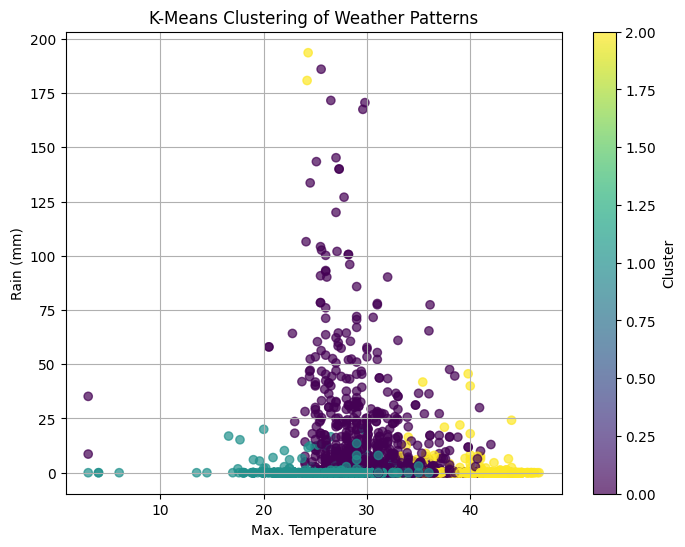

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df['Max.'], df['Rain'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Max. Temperature')
plt.ylabel('Rain (mm)')
plt.title('K-Means Clustering of Weather Patterns')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()